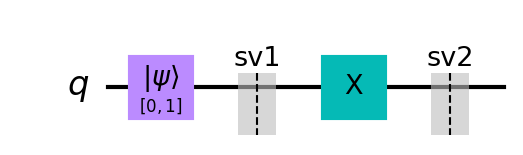

<IPython.core.display.Math object>

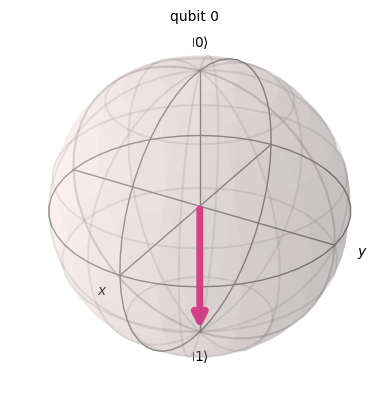

<IPython.core.display.Math object>

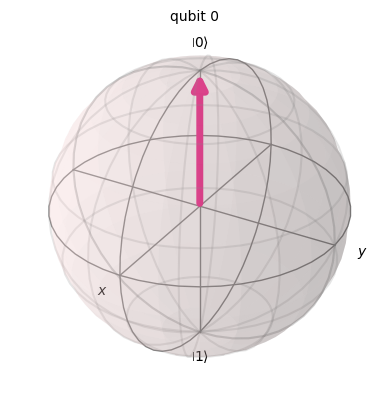

In [1]:
"""superposition.ipynb"""

from __future__ import annotations

import typing

import numpy as np
import qiskit  # type: ignore
from qis101_utils import as_latex
from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_bloch_multivector  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore
from qiskit.visualization import plot_histogram  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

# Cell 1 - One qubit in Z basis states

# Select a quantum computer to use
backend: Any = Aer.get_backend("aer_simulator")

# Create a new circuit with one qubit
qc: Any = QuantumCircuit(1)

# Initialize the (only) qubit (#0) to a 1 state
qc.initialize([0, 1], 0)
qc.save_statevector("sv1")

# Apply a NOT gate (Pauli X gate)
qc.x(0)
qc.save_statevector("sv2")

# Now run the circuit on the device
result: Any = execute(qc, backend).result()

# Get the state vectors
sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))  # type: ignore

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))  # type: ignore


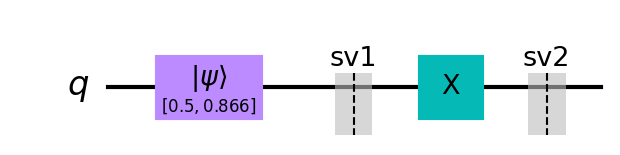

<IPython.core.display.Math object>

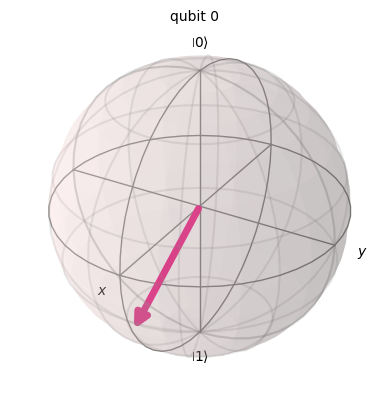

<IPython.core.display.Math object>

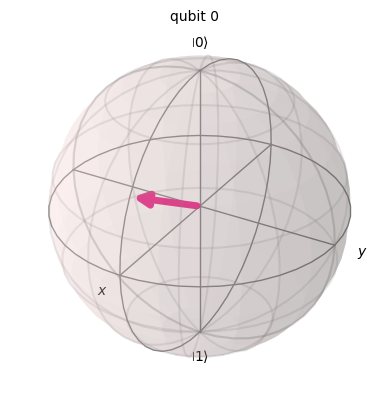

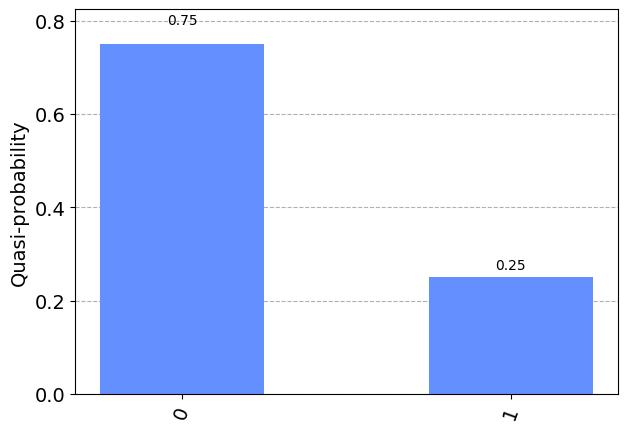

In [2]:
# Cell 2 - One qubit circuit not on Z basis

backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(1)

qc.initialize([0.5, np.sqrt(3) / 2], 0)
qc.save_statevector("sv1")

qc.x(0)
qc.save_statevector("sv2")

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))  # type: ignore

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))  # type: ignore

display(plot_histogram(counts))  # type: ignore


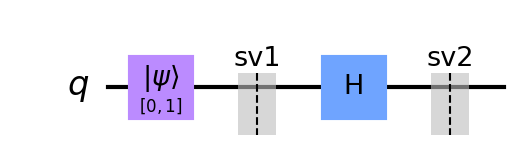

<IPython.core.display.Math object>

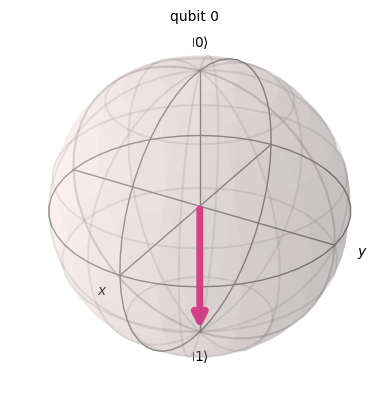

<IPython.core.display.Math object>

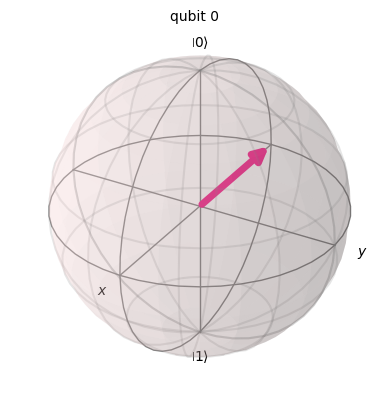

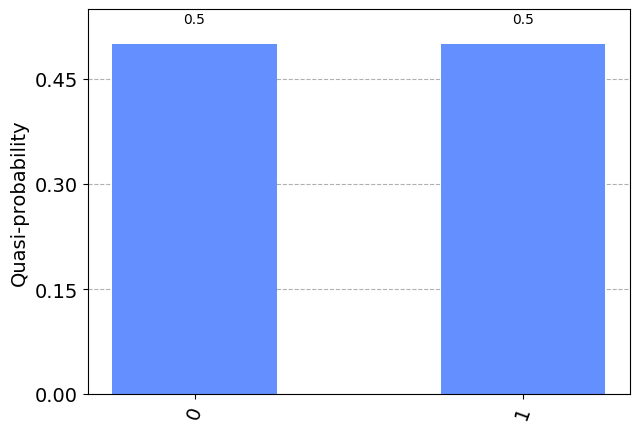

In [3]:
# Cell 3 - One Pete Box

backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(1)
qc.initialize([0, 1], 0)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")

result: Any = execute(qc, backend, shots=1).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))  # type: ignore

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))  # type: ignore

plot_histogram(counts)


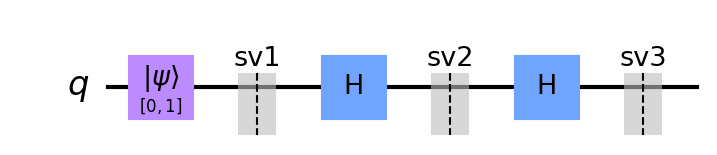

<IPython.core.display.Math object>

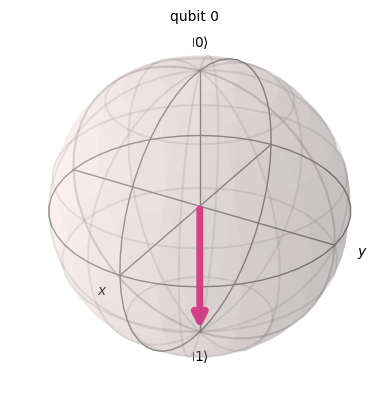

<IPython.core.display.Math object>

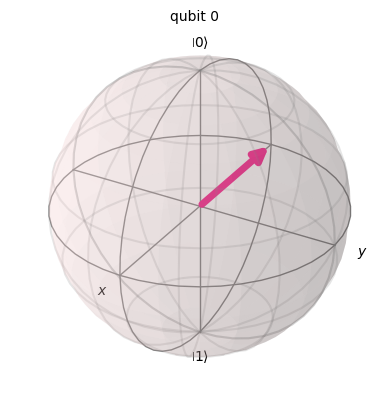

<IPython.core.display.Math object>

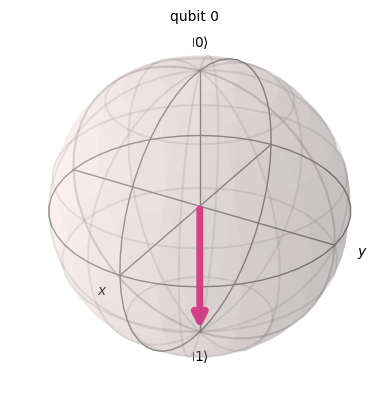

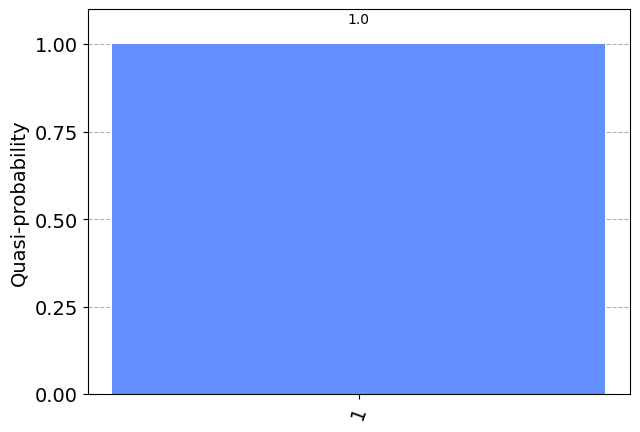

In [4]:
# Cell 4 - Two Pete Boxes
# Note: This demonstrates the Hadamard Gate is Unitary

backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(1)
qc.initialize([0, 1], 0)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.h(0)
qc.save_statevector("sv3")

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]
sv3: Any = result.data(0)["sv3"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))  # type: ignore

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))  # type: ignore

display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))  # type: ignore

display(plot_histogram(counts))  # type: ignore


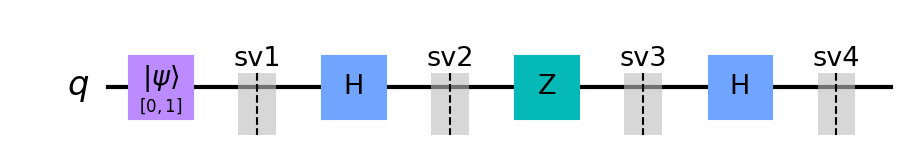

<IPython.core.display.Math object>

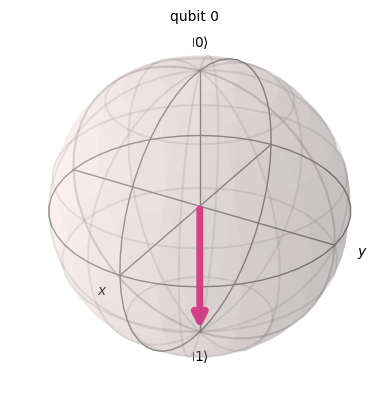

<IPython.core.display.Math object>

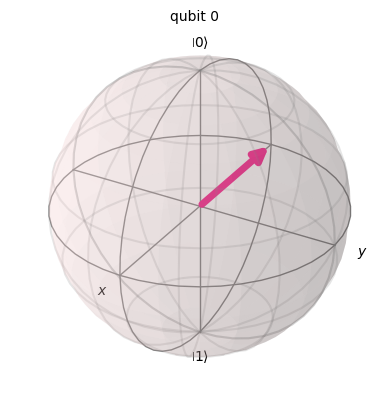

<IPython.core.display.Math object>

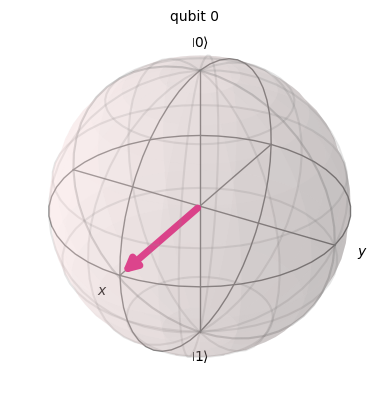

<IPython.core.display.Math object>

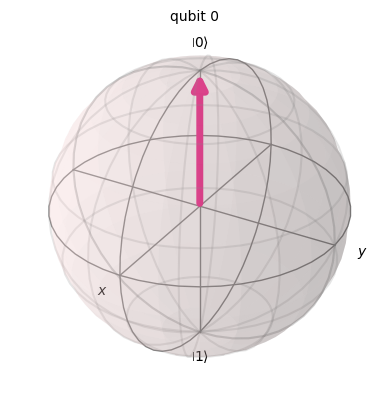

In [5]:
# Cell 5 - Gate Equivalence (no measurement)
# This demonstrates the identity X = HZH

backend: Any = Aer.get_backend("statevector_simulator")

qc: Any = QuantumCircuit(1)

qc.initialize([0, 1], 0)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.z(0)
qc.save_statevector("sv3")
qc.h(0)
qc.save_statevector("sv4")

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]
sv3: Any = result.data(0)["sv3"]
sv4: Any = result.data(0)["sv4"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_bloch_multivector(sv1))  # type: ignore

display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(plot_bloch_multivector(sv2))  # type: ignore

display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(plot_bloch_multivector(sv3))  # type: ignore

display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))
display(plot_bloch_multivector(sv4))  # type: ignore


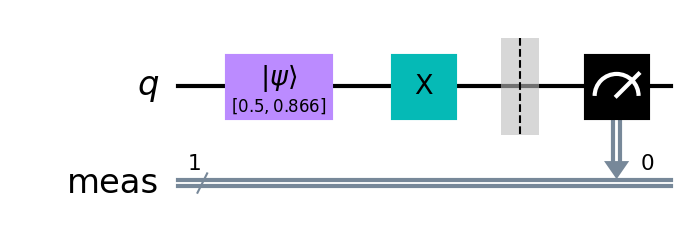

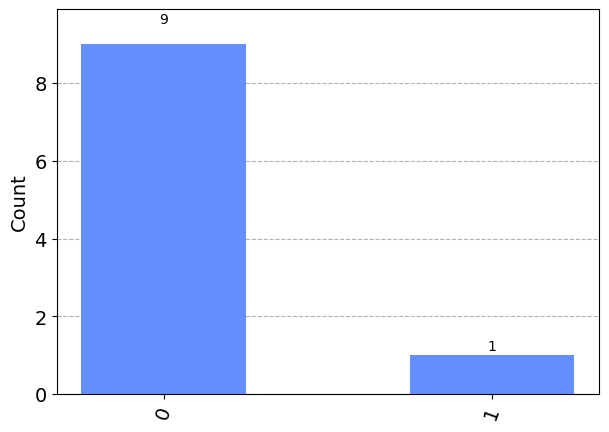

In [44]:
# Cell 6 - One qubit circuit not on basis (10 shots)

backend: Any = Aer.get_backend("aer_simulator")

qc: Any = QuantumCircuit(1)
qc.initialize([0.5, np.sqrt(3) / 2], 0)
qc.x(0)

qc.measure_all()

result: Any = execute(qc, backend, shots=10).result()
counts: Any = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))

display(plot_histogram(counts))  # type: ignore


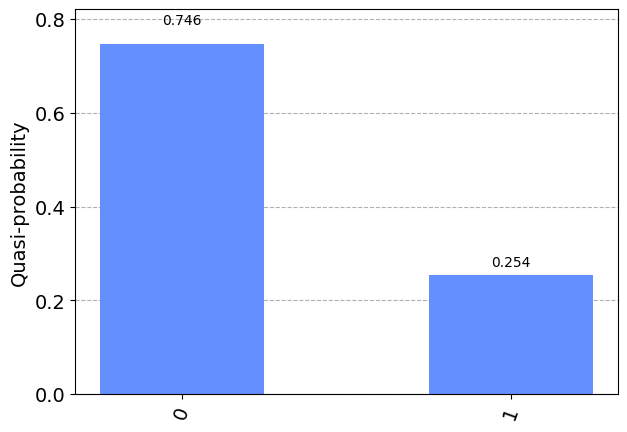

In [45]:
# Cell 7 - One qubit circuit not on basis (10,000 shots)

backend: Any = Aer.get_backend("aer_simulator")

qc: Any = QuantumCircuit(1)
qc.initialize([0.5, np.sqrt(3) / 2], 0)
qc.x(0)

qc.measure_all()

result: Any = execute(qc, backend, shots=10_000).result()
counts: Any = result.get_counts()

display(plot_distribution(counts))  # type: ignore
